## Dependencies & Data:

In [ ]:

!pip install qiskit
#!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
#!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 17.9 MB 488 kB/s 
     |████████████████████████████████| 237 kB 50.3 MB/s 
     |████████████████████████████████| 200 kB 49.4 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 1.4 MB 41.2 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 38.1 MB 231 kB/s 
     |████████████████████████████████| 943 kB 38.2 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 38.2 MB 2.3 MB/s 
     |████████████████████████████████| 3.6 MB 34.8 MB/s 
     |████████████████████████████████| 112 kB 44.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.33.1-py3-none-any.whl size=11766 sha256=c92ab682aff75ce10ca18ac7a6b9d67655b0ca83bff9954938c57427432e8193
  Stored in directory: /root/.cache/pip/wheels/ba/a3/4b/0a2713b316d9d2c1aafaac4c917436a8e02ff334fee3aa

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [92]:

# Listing 2.1: Load the data from the csv‐files
import pandas as pd

#df = pd.read_csv('https://grantmlong.com/data/titanic.csv')
train = pd.read_csv('train.csv')
#test = pd.read_csv('./data/test.csv')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:

# Listing 2.2: The shapes of the Titanic datasets
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


In [ ]:
# Listing 2.3: The structure of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Listing 2.4: The structure of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Listing 2.5: Look at the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Section: Data Preparation and Cleaning

In [ ]:
# Listing 2.6: Cope with missing values
# option 1
# We only have two passengers without it. This is bearable
train = train.dropna(subset=["Embarked"])    

# option 2
# We only have very few information about the cabin, let's drop it
train = train.drop("Cabin", axis=1)       

# option 3
# The age misses quite a few times. But intuition
# says it might be important for someone's chance to survive.
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)     

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
print('The mean age for passengers is {}'.format(mean))

The mean age for passengers is 29.64209269662921


In [ ]:

# Listing 2.7: Unique values in columns
print('There are {} different (unique) PassengerIds in the data'
    .format(train["PassengerId"].nunique()))
print('There are {} different (unique) names in the data'
    .format(train["Name"].nunique()))
print('There are {} different (unique) ticket numbers in the data'
    .format(train["Ticket"].nunique()))

There are 889 different (unique) PassengerIds in the data
There are 889 different (unique) names in the data
There are 680 different (unique) ticket numbers in the data


In [ ]:
# Listing 2.8: Remove identifying data
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
# Listing 2.9: Transforming textual data into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:

# Listing 2.10: The maximum values
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))

The maximum age is 80.0
The maximum fare is 512.3292


In [ ]:

# Listing 2.11: Normalization of the data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'
    .format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [ ]:

# Listing 2.12: Separating input from labels and training from testing sets
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(
    input_data, labels, test_size = 0.2)

print('We have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))

We have 711 training and 178 testing rows
There are 7 input columns


In [ ]:
# Listing 2.13: Save the data to the filesystem
import numpy as np

with open('train.npy', 'wb') as f:
    np.save(f, train_input)
    np.save(f, train_labels)

with open('test.npy', 'wb') as f:
    np.save(f, test_input)
    np.save(f, test_labels)
#CAPTION Save the data to the filesystem

## Baseline

In [ ]:

# Listing 2.14: A random classifier
import random
random.seed(a=None, version=2)
 
def classify(passenger):
    return random.randint(0, 1)

# Listing 2.15: The classification runner
def run(f_classify, x):
    return list(map(f_classify, x))

# Listing 2.16: Run the classifier
result = run(classify, train_input)

In [ ]:

# Listing 2.17: Evaluate the classifier
def evaluate(predictions, actual):
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions,actual))
    ))
    return '{} correct predictions out of {}. Accuracy {:.0f} %' \
        .format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))

341 correct predictions out of 711. Accuracy 48 %


In [ ]:

# Listing 2.18: Always predict a passenger died
def predict_death(item):
    return 0

print(evaluate(run(predict_death, train_input), train_labels))

442 correct predictions out of 711. Accuracy 62 %


## Section: Classifier Evaluation and Measures

In [ ]:

# Listing 2.19: Confustion matrix of the predict death classifier
from sklearn.metrics import confusion_matrix

predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[442,   0],
       [269,   0]])

In [ ]:

# Listing 2.20: The precision score
from sklearn.metrics import precision_score
print('The precision score of the predict_death classifier is {}'
    .format(precision_score(train_labels, predictions)))

The precision score of the predict_death classifier is 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Listing 2.21: The recall score
from sklearn.metrics import recall_score
print('The recall score of the predict_death classifier is {}'
    .format(recall_score(train_labels, predictions)))

The recall score of the predict_death classifier is 0.0


In [ ]:

# Listing 2.22: The specificity and the npv
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))

The specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.62


In [ ]:

# Listing 2.23: The scores of the random classifier
random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

print('The precision score of the random classifier is {:.2f}'
    .format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'
    .format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'
    .format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'
    .format(npv(random_cm)))

The precision score of the random classifier is 0.38
The recall score of the random classifier is 0.49
The specificity score of the random classifier is 0.51
The npv score of the random classifier is 0.62


## Section: Unmask the Hypocrite Classifier

In [ ]:

# Listing 2.24: A hypocrite classifier
def hypocrite(passenger, weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0, 1))))

# Listing 2.25: The scores of the hypocrite classifier
w_predictions = run(lambda passenger: hypocrite(passenger, -0.5), train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'
    .format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'
    .format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'
    .format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'
    .format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.36
The recall score of the hypocrite classifier is 0.23
The specificity score of the hypocrite classifier is 0.75
The npv score of the hypocrite classifier is 0.62


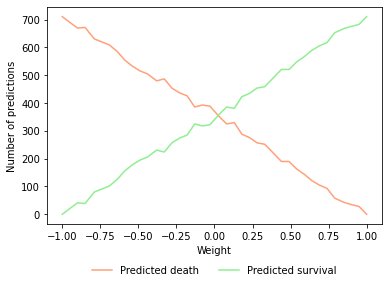

In [ ]:

# Listing 2.26: Run the hypocrite classifiers
import numpy as np

# number of steps to consider between -1 and 1
cnt_steps = 40

# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [-1, -0.95, ... 0.9, 0.95, 1.0]
weights = list(map(
    lambda weight: round(weight, 2),
    np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()
))

# list of predictions at every step
l_predictions = list(map(
    lambda step: run(
        lambda passenger: hypocrite(passenger, weights[step]),
        train_input
    ),
    steps
))

# list of confusion matrices at every steo
l_cm = list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]),
    steps
))

# Listing 2.27: Plot the distribution of predictions
import matplotlib.pyplot as plt
import matplotlib

# create a graph for the number of predicted deaths
deaths, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    'lightsalmon', # color of the graph
    label='Predicted death'
)

# create a graph for the number of predicted survivals
survivals, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    'lightgreen', # color of the graph
    label='Predicted survival'
)

plt.legend(handles=[deaths, survivals],loc='upper center',
    bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

In [ ]:

# Listing 2.28: Metrics of the hypocrite classifier
l_precision = list(map(lambda step: precision_score(train_labels, l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


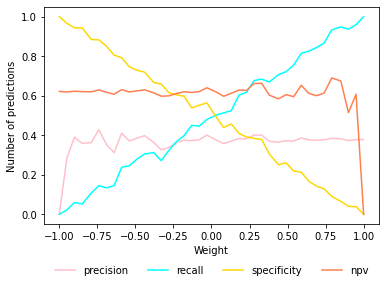

In [ ]:
# Listing 2.29: Plot the performance measures
m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")

plt.legend(
    handles=[m_precision, m_recall, m_specificity, m_npv],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    framealpha=0.0,
    ncol=4)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

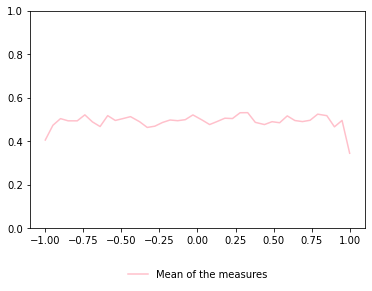

In [ ]:
# Listing 2.30: Calculating the mean of the measures
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall, l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")

plt.legend(handles=[m_mean],loc='upper center',
    bbox_to_anchor=(0.5, -0.15),framealpha=0.0)
plt.ylim(0, 1)
plt.show()

In [ ]:

# Listing 2.31: A reusable function to unmask the hypocrite classifier
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))

In [ ]:
# Listing 2.32: The report of the random classifier
classifier_report(
    "Random PQC", 
    run,
    classify,
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.40
The recall score of the Random PQC classifier is 0.49
The specificity score of the Random PQC classifier is 0.56
The npv score of the Random PQC classifier is 0.64
The information level is: 0.52


## Section: Exploring the Quantum States

In [ ]:

# Listing 3.1 Verify Qiskit version
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.2', 'qiskit-aqua': None, 'qiskit': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:

# Listing 3.2: The first qubit
from qiskit import QuantumCircuit

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |1>
initial_state = [0,1]

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0)

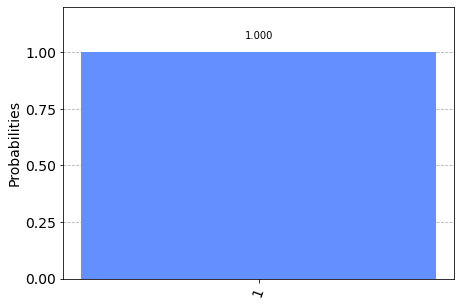

In [ ]:

# Listing 3.3: Prepare the simulation backend
from qiskit import execute, Aer

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend).result()

# Listing 3.4: The measured qubit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

In [ ]:
# Listing 3.5: First attempt to superpose two states
# Define state |psi>
initial_state = [1, 1]

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0) 

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)

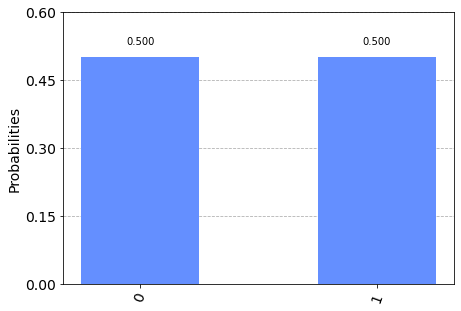

In [ ]:
# Listing 3.6: Weighted initial state
from math import sqrt

# Define state |psi>
initial_state = [1/sqrt(2), 1/sqrt(2)] 

# Redefine the quantum circuit
qc = QuantumCircuit(1)

# Initialise the 0th qubit in the state `initial_state`
qc.initialize(initial_state, 0) 

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)

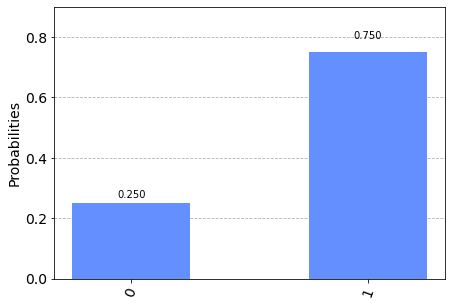

In [ ]:
# Listing 3.7: The qubit with a probability of 0.25 to result in 0
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt

qc = QuantumCircuit(1)
initial_state = [1/2, sqrt(3)/2] # Here, we insert the state
qc.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

## Section: Bypassing The Normalization

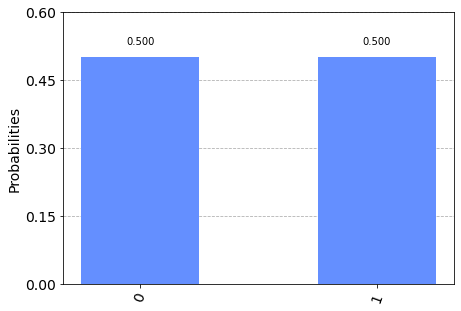

In [ ]:
# Listing 3.8: Using theta to specify the quantum state vector
from math import pi, cos, sin
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def get_state (theta):
    """returns a valid state vector"""
    return [cos(theta/2), sin(theta/2)]

# play with the values for theta to get a feeling
theta = -pi/2 # affects the probabilities


# create, initialize, and execute the quantum circuit
qc = QuantumCircuit(1)
qc.initialize(get_state(theta), 0) 
backend = Aer.get_backend('statevector_simulator') 
result = execute(qc,backend).result()
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

## Section: Exploring The Observer Effect

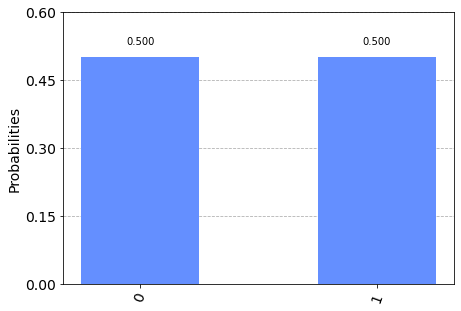

In [ ]:
# Listing 3.9: A circuit without measurement
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)  

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)] 

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0) 

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
# Listing 3.10: Draw the circuit
qc.draw(output='text')

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

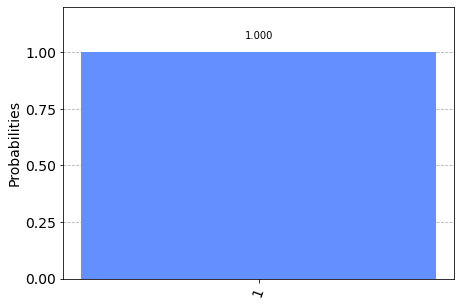

In [ ]:
# Listing 3.11: Circuit with measurement
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)

# observe the qubit
qc.measure_all()

# Do the simulation, returning the result
result = execute(qc,backend).result() 
counts = result.get_counts()
plot_histogram(counts)

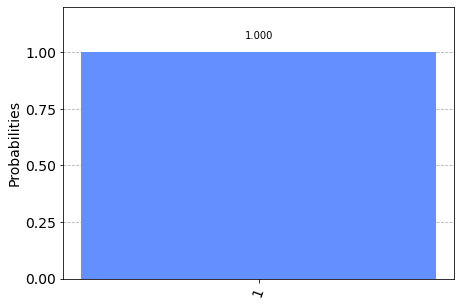

In [ ]:
# Listing 3.12: Another circuit with measurement
qc = QuantumCircuit(1) 
qc.initialize(initial_state, 0)
qc.measure_all()
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
# Listing 3.13: Draw a circuit with measurement
qc.draw(output='text')

┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0

## Section: Parameterized Quantum Circuit

In [ ]:
# Listing 3.14: A simple PQC binary classifier
qc = QuantumCircuit(1) 
initial_state = [1/sqrt(2), 1/sqrt(2)] 
qc.initialize(initial_state, 0)
qc.measure_all()

In [ ]:

# Listing 3.15: The parameterized quantum circuit classifier
from qiskit import execute, Aer, QuantumCircuit
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

def pqc_classify(backend, passenger_state):
    """backend -- a qiskit backend to run the quantum circuit at
    passenger_state -- a valid quantum state vector"""
    
    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1) 

    # Define state |Psi> and initialize the circuit
    qc.initialize(passenger_state, 0)
    
    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=execute(qc,backend).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)
    
    # get the bit 0 or 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [ ]:
# Listing 3.16: Load the data
import numpy as np

with open('train.npy', 'rb') as f:
    train_input = np.load(f)
    train_labels = np.load(f)

with open('test.npy', 'rb') as f:
    test_input = np.load(f)
    test_labels = np.load(f)

In [ ]:

# REDEFINE OR IMPORT THE FUNCTIONS OF CHAPTER 2
def run(f_classify, x):
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
#CAPTION A reusable function to unmask the hypocrite classifier

In [ ]:
# Listing 3.17: The scores of the random quantum classifier
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Specify the quantum state that results in either 0 or 1
initial_state = [1/sqrt(2), 1/sqrt(2)] 

classifier_report("Random PQC", 
    run,
    lambda passenger: pqc_classify(backend, initial_state),
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.38
The recall score of the Random PQC classifier is 0.52
The specificity score of the Random PQC classifier is 0.50
The npv score of the Random PQC classifier is 0.63
The information level is: 0.51


In [ ]:

# Listing 3.18: Initialization of classical (pseudo‐)random
import random
random.seed(a=None, version=2)

## Section: Variational Hybrid Quantum-Classical Algorithm

In [ ]:

# Listing 3.19: Return statement of pqc-classify
def pqc_classify(backend, passenger_state):
    # ...
    
    # get the bit 0 or 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

# Listing 3.20: Pre‐processing template
def pre_process(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """
    quantum_state = [1/sqrt(2), 1/sqrt(2)] 
    return quantum_state

# Listing 3.21: The parameterized quantum circuit
def pqc(backend, quantum_state):
    """
    backend -- a qiskit backend to run the quantum circuit at
    quantum_state -- a valid quantum state vector  
    returns the counts of the measurement
    """

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1) 

    # Define state |Psi> and initialize the circuit
    qc.initialize(quantum_state, 0)
    
    # Measure the qubit
    qc.measure_all()

    # run the quantum circuit
    result=execute(qc,backend).result()

    # get the counts, these are either {'0': 1} or {'1': 1}
    counts=result.get_counts(qc)

    return counts


# Listing 3.22: Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [ ]:
# Listing 3.23: The scores of the random quantum classifier# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

classifier_report(
    "Variational",
    run,
    lambda passenger: post_process(pqc(backend, pre_process(passenger))),
    train_input,
    train_labels)

The precision score of the Variational classifier is 0.34
The recall score of the Variational classifier is 0.45
The specificity score of the Variational classifier is 0.48
The npv score of the Variational classifier is 0.59
The information level is: 0.47


In [ ]:

# Listing 3.24: weigh a passenger's feature
def weigh_feature(feature, weight):
    """
    feature -- the single value of a passenger's feature
    weight -- the overall weight of this feature
    returns the weighted feature 
    """
    return feature*weight

# Listing 3.25: Calculate the overall probability
from functools import reduce

def get_overall_probability(features, weights):
    """
    features -- list of the features of a passenger
    weights -- list of all features' weights
    """
    return reduce(
        lambda result, data: result + weigh_feature(*data),
        zip(features, weights),
        0
    )

# Listing 3.26: Calculate the correlation coefficients
from scipy.stats import spearmanr

# separate the training data into a list of the columns
columns = [list(map(lambda passenger: passenger[i], train_input)) for i in range(0,7)]

# calculate the correlation coefficient for each column
correlations = list(map(lambda col: spearmanr(col, train_labels)[0], columns))
correlations

[-0.3305482906024159,
 -0.5600502929619234,
 -0.04135997153312576,
 0.07751292377988972,
 0.12907353856581041,
 0.3144843686189664,
 -0.15201291996593078]

In [ ]:
# Listing 3.27: The weighting pre‐processing
from math import pi, sin, cos

def get_state (theta):
    """returns a valid state vector from angle theta"""
    return [cos(theta/2), sin(theta/2)]

def pre_process_weighted(passenger):
    """
    passenger -- the normalized (array of numeric data) passenger data
    returns a valid quantum state
    """

    # caluclate the overall probability
    mu = get_overall_probability(passenger, correlations)
    
    # theta between 0 (|0>) and pi (|1>)
    quantum_state = get_state((1-mu)*pi)

    return quantum_state

In [ ]:
# Listing 3.28: Run the PQC with the weighted pre‐processing
backend = Aer.get_backend('statevector_simulator') 

classifier_report("Variational", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    train_input,
    train_labels)

The precision score of the Variational classifier is 0.70
The recall score of the Variational classifier is 0.58
The specificity score of the Variational classifier is 0.85
The npv score of the Variational classifier is 0.77
The information level is: 0.72


In [ ]:
# Listing 3.29: Test the PQC‐based classifier on data it has not seen before
classifier_report("Variational-Test", 
    run,
    lambda passenger: post_process(pqc(backend, pre_process_weighted(passenger))),
    test_input,
    test_labels)

The precision score of the Variational-Test classifier is 0.72
The recall score of the Variational-Test classifier is 0.65
The specificity score of the Variational-Test classifier is 0.83
The npv score of the Variational-Test classifier is 0.78
The information level is: 0.74


## Section: Towards Naïve Bayes

In [97]:

# Listing 4.2: Calculating the probability to survive the Titanic shipwreck
# list of all survivors
survivors =  train[train.Survived.eq(1)]

# calculate the probability
prob_survival = len(survivors)/len(train)
print('P(Survival) is {:.2f}'.format(prob_survival))

P(Survival) is 0.38


In [98]:
# Listing 4.3: Calculating the probability to survive if the passenger had asecond‐class ticket
# list of all passengers with a second class ticket
secondclass = train[train.Pclass.eq(2)]

prob_survival_secondclass = len(secondclass[secondclass.Survived.eq(1)])/len(secondclass)
print('P(Survived|SecondClass) is {:.2f}'.format(prob_survival_secondclass))

P(Survived|SecondClass) is 0.47


In [99]:

# Listing 4.4: Calculating the probability to survive if the passenger was female
#list of all females
females = train[train.Sex.eq("female")]

prob_survival_female = len(females[females.Survived.eq(1)])/len(females)
print('P(Survived|Female) is {:.2f}'.format(prob_survival_female))

P(Survived|Female) is 0.74


In [100]:

# Listing 4.5: Calculating the probability to survive if the passenger was female andhad a second‐class ticket
#list of all females with a second class ticket
secondclass_female = secondclass[secondclass.Sex.eq("female")]
prob_survival_secondclass_female = len(secondclass_female[secondclass_female.Survived.eq(1)])/len(secondclass_female)
print('P(Survived|SecondClass,Female) is {:.2f}'.format(prob_survival_secondclass_female))

P(Survived|SecondClass,Female) is 0.92


In [101]:

# Listing 4.6: Counting passengers
print('There are {} female passengers the dataset'.format(len(females)))
print('There are {} passengers with a second-class ticket in the dataset'.format(len(secondclass)))
print('There are {} female passengers with a second-class ticket in\nthe dataset'.format(len(secondclass_female)))

There are 314 female passengers the dataset
There are 184 passengers with a second-class ticket in the dataset
There are 76 female passengers with a second-class ticket in
the dataset


## Section: Bayes' Theorem

In [102]:

# Listing 4.7: Calculating the posterior probability
# calculate the backwards probability of a survivor having a
# second-class ticket
p_surv_seccl = len(survivors[survivors.Pclass.eq(2)])/len(survivors)

# calculate the modifier and the informativeness of the second-class ticket
m_seccl = p_surv_seccl / (len(secondclass)/len(train))
i_seccl = abs(m_seccl-1)
print('The modifier of the second-class ticket is {:.2f}.\nThe informativeness is {:.2f}'.format(m_seccl, i_seccl))

# calculate the backwards probability of a survivor being female
p_surv_female = len(survivors[survivors.Sex.eq("female")])/len(survivors)

# calculate the modifier and the informativeness of being female
m_female = p_surv_female / (len(females)/len(train))
i_female = abs(m_female-1)
print('The modifier of being female is {:.2f}.\nThe informativeness is {:.2f}'.format(m_female,i_female))

# calculate the posterior probability
posterior = m_seccl * m_female * prob_survival
print('\nP(Survived|SecondClass,Female) is {:.2f}'.format(posterior))

The modifier of the second-class ticket is 1.23.
The informativeness is 0.23
The modifier of being female is 1.93.
The informativeness is 0.93

P(Survived|SecondClass,Female) is 0.91


## Section: Gaussian Naïve Bayes

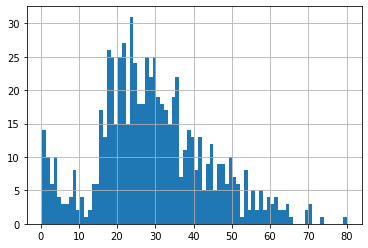

In [93]:

# Listing 4.8: The actual distribution of the passenger age
train["Age"].hist(bins=80)

In [94]:

# Listing 4.9: Calculating the mean and the standard deviation of the passenger age
age_mean = train["Age"].mean()
age_std = train["Age"].std()
print('The average passenger age is {:.1f}. The standard deviation is {:.1f}'.format(age_mean, age_std))

The average passenger age is 29.7. The standard deviation is 14.5


In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:

# Listing 4.10: Calculating modifier and informativenesses of the age of 29
from math import exp, sqrt, pi

def density(mu,sigma,age):
    return 1/(sigma*sqrt(2*pi))*exp(-0.5*((age-mu)/sigma)**2)

survivor_age_mean = survivors["Age"].mean()
survivor_age_std = survivors["Age"].std()
print('The average survivor age is {:.1f}. The standard deviation is {:.1f}'.format(survivor_age_mean, survivor_age_std))

# calculate the Informativeness of the age of 29
p_surv_age29 = density(survivor_age_mean, survivor_age_std, 29)
p_age29 = density(age_mean, age_std, 29)
m_age29 = p_surv_age29 / p_age29
i_age29 = abs(m_age29-1)
print('The modifier of the age of 29 is {:.2f}.'.format(m_age29))
print('Its informativeness is {:.2f}.'.format(i_age29))

The average survivor age is 28.3. The standard deviation is 15.0
The modifier of the age of 29 is 0.97.
Its informativeness is 0.03.


In [104]:

# Listing 4.11: Calculating informativenesses of other ages
# calculate the Informativeness of the age of 70
p_surv_age70 = density(survivor_age_mean, survivor_age_std, 70)
p_age70 = density(age_mean, age_std, 70)
m_age70 = p_surv_age70 / p_age70
i_age70 = abs(m_age70-1)
print('The modifier of the age of 70 is {:.2f}.'.format(m_age70))
print('Its informativeness is {:.2f}.\n'.format(i_age70))

# calculate the Informativeness of the age of 5
p_surv_age5 = density(survivor_age_mean, survivor_age_std, 5)
p_age5 = density(age_mean, age_std, 5)
m_age5 = p_surv_age5 / p_age5
i_age5 = abs(m_age5-1)
print('The modifier of the age of 5 is {:.2f}.'.format(m_age5))
print('Its informativeness is {:.2f}.'.format(i_age5))

The modifier of the age of 70 is 0.94.
Its informativeness is 0.06.

The modifier of the age of 5 is 1.22.
Its informativeness is 0.22.


In [ ]:

# Listing 7.1: Calculate the prior‐probability
import pandas as pd
train = pd.read_csv('./data/train.csv')

# total
cnt_all = len(train)

# list of all survivors
survivors =  train[train.Survived.eq(1)]
cnt_survivors = len(survivors)

# calculate the prior probability
prob_survival = len(survivors)/cnt_all

print("The prior probability to survive is: ", round(prob_survival, 2))

## Section: Bayesian Networks

In [106]:

import pandas as pd
#train = pd.read_csv('./data/train.csv')

# Listing 9.1: The chances of survival
def chance_to_survive(age):
    pop = train[train.Age.eq(age)]
    surv = pop[pop.Survived.eq(1)]
    prob = len(surv)/(len(pop)+1)
    return "A {}-year old passenger had a chance to survive of {}".format(age, prob)

print(chance_to_survive(47))
print(chance_to_survive(48))

A 47-year old passenger had a chance to survive of 0.1
A 48-year old passenger had a chance to survive of 0.6


In [107]:

# Listing 9.2: Survival of children
# max age of a child
max_child_age = 8

# probability to survive of children
pop_child = train[train.Age.le(max_child_age)]
surv_child = pop_child[pop_child.Survived.eq(1)]
p_child = len(surv_child)/len(pop_child)

# probability to survive of adults
pop_adult = train[train.Age.gt(max_child_age)]
surv_adult = pop_adult[pop_adult.Survived.eq(1)]
p_adult = len(surv_adult)/len(pop_adult)

print("{} children had a chance to survive of {}".format(len(pop_child), round(p_child, 2)))
print("{} adults had a chance to survive of {}".format(len(pop_adult), round(p_adult, 2)))

54 children had a chance to survive of 0.67
660 adults had a chance to survive of 0.38



## Section: Composing Quantum ComputingControls

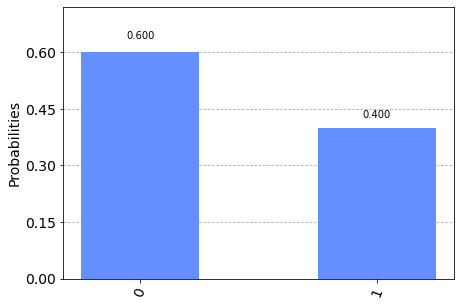

In [108]:
# Listing 9.3: Specify the marginal probability
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import asin, sqrt

def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))
    
qc = QuantumCircuit(1)

# Set qubit to prior
qc.ry(prob_to_angle(0.4), 0)

# execute the qc
results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(results)

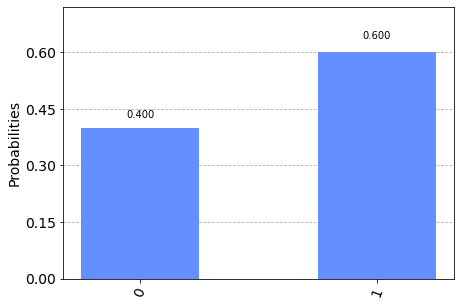

In [109]:
# Listing 9.4: Use the X‐gate to work with the remainder
qc = QuantumCircuit(1)

# Set qubit to prior
qc.ry(prob_to_angle(0.4), 0)

# Switch the qubit's value
qc.x(0)

# execute the qc
results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(results)

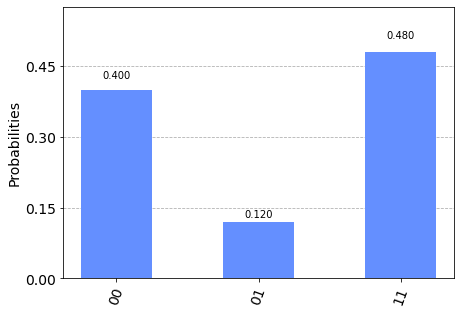

In [110]:
# Listing 9.5: Calculate the joint probability
qc = QuantumCircuit(2)

# Set qubit to prior
qc.ry(prob_to_angle(0.4), 0)

# Switch the qubit's value
qc.x(0)

# Calculate the joint probability of NOT-prior and an event
qc.cry(prob_to_angle(0.8), 0,1)

# execute the qc
results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(results)

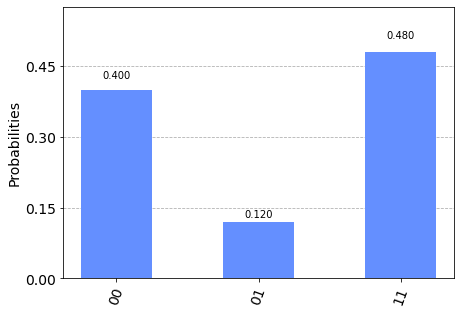

In [111]:
# Listing 9.6: Decomposition of the CRY‐gate
qc = QuantumCircuit(2)

# Set qubit to prior
qc.ry(prob_to_angle(0.4), 0)

# Switch the qubit's value
qc.x(0)

# Apply half of the event's probability
qc.ry(prob_to_angle(0.8)/2, 1)

# entangle qubits 0 and 1
qc.cx(0,1)

# Apply the other half of ev_b
qc.ry(-prob_to_angle(0.8)/2, 1)

# unentganle qubits 0 and 1
qc.cx(0,1)

# execute the qc
results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(results)

In [112]:
# Listing 9.7: The CCNOT‐function
from math import pi
theta = pi/2

def ccnot(qc):
    # Apply the first half of the rotatione
    qc.cry(theta, 1,2)

    # This sequence has no effect if both control qubits
    # are in state |1>
    qc.cx(0,1)
    qc.cry(-theta,1,2)
    qc.cx(0,1)

    # Apply the second half of the rotation
    qc.cry(theta, 0,2)

    # execute the qc
    return execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()

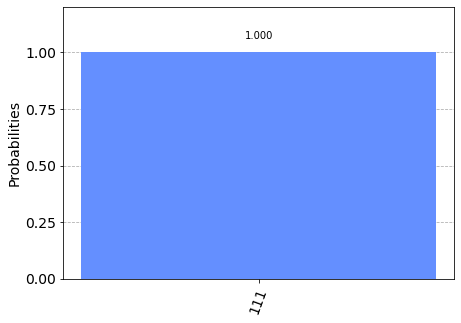

In [113]:
# Listing 9.8: The CCNOT‐gate with both control qubits in state |1>
qc = QuantumCircuit(3)

# set both qubits to |1>
qc.x(0)
qc.x(1)

# apply the ccnot-gate and execute the qc
results = ccnot(qc)
plot_histogram(results)

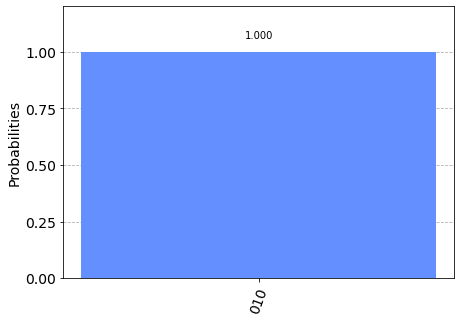

In [114]:
# Listing 9.9: The CCNOT‐gate with only control qubit q1 in state |1>
qc = QuantumCircuit(3)

# set only qubit q_1 to |1>
qc.x(1)

# apply the ccnot-gate and execute the qc
results = ccnot(qc)
plot_histogram(results)

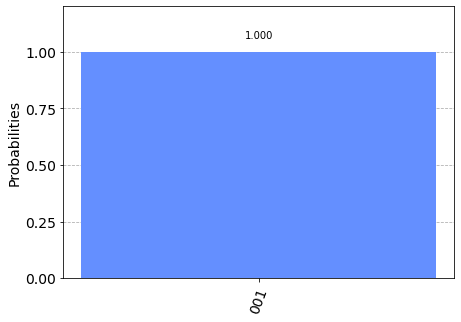

In [115]:
# Listing 9.10: The CCNOT‐gate with only control qubit q0 in state |1>
qc = QuantumCircuit(3)

# set only qubit q_0 to |1>
qc.x(0)

# apply the ccnot-gate and execute the qc
results = ccnot(qc)
plot_histogram(results)

## Section: Circuit implementation

In [116]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import asin, sqrt

#import pandas as pd
#train = pd.read_csv('./data/train.csv')

def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))

In [117]:
# Listing 9.11: Initialize the parent nodes
# the maximum age of a passenger we consider as a child
max_child_age = 8

# probability of being a child
population_child = train[train.Age.le(max_child_age)]
p_child = len(population_child)/len(train)

# probability of being female
population_female = train[train.Sex.eq("female")]
p_female = len(population_female)/len(train)

# Initialize the quantum circuit
qc = QuantumCircuit(3)

# Set qubit0 to p_child
qc.ry(prob_to_angle(p_child), 0)

# Set qubit1 to p_female
qc.ry(prob_to_angle(p_female), 1)

In [118]:
# Listing 9.12: Definition of the CCRY‐gate
def ccry(qc, theta, control1, control2, controlled):
    qc.cry(theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(-theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(theta/2, control1, controlled)

In [119]:
# Listing 9.13: Calculate the conditional probabilities
# female children
population_female=train[train.Sex.eq("female")]
population_f_c=population_female[population_female.Age.le(max_child_age)]
surv_f_c=population_f_c[population_f_c.Survived.eq(1)]
p_surv_f_c=len(surv_f_c)/len(population_f_c)

# female adults
population_f_a=population_female[population_female.Age.gt(max_child_age)]
surv_f_a=population_f_a[population_f_a.Survived.eq(1)]
p_surv_f_a=len(surv_f_a)/len(population_f_a)

# male children
population_male=train[train.Sex.eq("male")]
population_m_c=population_male[population_male.Age.le(max_child_age)]
surv_m_c=population_m_c[population_m_c.Survived.eq(1)]
p_surv_m_c=len(surv_m_c)/len(population_m_c)

# male adults
population_m_a=population_male[population_male.Age.gt(max_child_age)]
surv_m_a=population_m_a[population_m_a.Survived.eq(1)]
p_surv_m_a=len(surv_m_a)/len(population_m_a)

In [120]:
# Listing 9.14: Initialize the child node
# set state |00> to conditional probability of male adults
qc.x(0)
qc.x(1)
ccry(qc,prob_to_angle(p_surv_m_a),0,1,2)
qc.x(0)
qc.x(1)

# set state |01> to conditional probability of male children
qc.x(0)
ccry(qc,prob_to_angle(p_surv_m_c),0,1,2)
qc.x(0)

# set state |10> to conditional probability of female adults
qc.x(1)
ccry(qc,prob_to_angle(p_surv_f_a),0,1,2)
qc.x(1)

# set state |11> to conditional probability of female children
ccry(qc,prob_to_angle(p_surv_f_c),0,1,2)

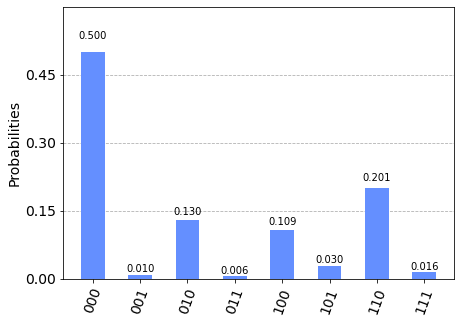

In [121]:
# Listing 9.15: Execute the circuit
# execute the qc
results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(results)

In [122]:

# Listing 9.16: A quantum circuit with classical register
qr = QuantumRegister(3)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

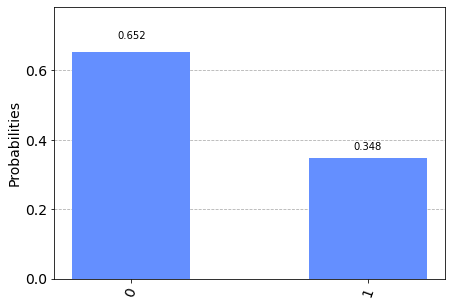

In [123]:
# Listing 9.17: Run the circuit including a measurement

# -- INCLUDE ALL GATES HERE --
# Set qubit0 to p_child
qc.ry(prob_to_angle(p_child), 0)

# Set qubit1 to p_female
qc.ry(prob_to_angle(p_female), 1)

# set state |00> to conditional probability of male adults
qc.x(0)
qc.x(1)
ccry(qc,prob_to_angle(p_surv_m_a),0,1,2)
qc.x(0)
qc.x(1)

# set state |01> to conditional probability of male children
qc.x(0)
ccry(qc,prob_to_angle(p_surv_m_c),0,1,2)
qc.x(0)

# set state |10> to conditional probability of female adults
qc.x(1)
ccry(qc,prob_to_angle(p_surv_f_a),0,1,2)
qc.x(1)

# set state |11> to conditional probability of female children
ccry(qc,prob_to_angle(p_surv_f_c),0,1,2)

qc.measure(qr[2], cr[0])
results = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
plot_histogram(results)

## Estimating a variable:

In [124]:

# Listing 10.14: Apply the known
#import pandas as pd
#train = pd.read_csv('./data/train.csv')

# the maximum age of a passenger we consider as a child
max_child_age = 8

# probability of being a child
population_child = train[train.Age.le(max_child_age)]
p_child = len(population_child)/len(train)

# probability of being female
population_female = train[train.Sex.eq("female")]
p_female = len(population_female)/len(train)

# positions of the qubits
QPOS_ISCHILD = 0
QPOS_SEX = 1

def apply_ischild_sex(qc):
    # set the marginal probability of isChild
    qc.ry(prob_to_angle(p_child), QPOS_ISCHILD)

    # set the marginal probability of Sex
    qc.ry(prob_to_angle(p_female), QPOS_SEX)

In [125]:

def ccry(qc, theta, control1, control2, controlled):
    qc.cry(theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(-theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(theta/2, control1, controlled)

In [126]:

# Listing 10.15: Represent the norm
# position of the qubit representing the norm
QPOS_NORM = 2

def apply_norm(qc, norm_params):
    """
    norm_params = {
        'p_norm_am': 0.25,
        'p_norm_af': 0.35,
        'p_norm_cm': 0.45,
        'p_norm_cf': 0.55
    }
    """

    # set the conditional probability of Norm given adult/male
    qc.x(QPOS_ISCHILD)
    qc.x(QPOS_SEX)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_am']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)
    qc.x(QPOS_ISCHILD)
    qc.x(QPOS_SEX)

    # set the conditional probability of Norm given adult/female
    qc.x(QPOS_ISCHILD)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_af']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)
    qc.x(QPOS_ISCHILD)

    # set the conditional probability of Norm given child/male
    qc.x(QPOS_SEX)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_cm']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)
    qc.x(QPOS_SEX)

    # set the conditional probability of Norm given child/female
    ccry(qc, prob_to_angle(
        norm_params['p_norm_cf']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)

In [127]:

# Listing 10.16: Calculate the probabilities related to the ticket‐class
pop_first = train[train.Pclass.eq(1)]
surv_first =  round(len(pop_first[pop_first.Survived.eq(1)])/len(pop_first), 2)
p_first = round(len(pop_first)/len(train), 2)

pop_second = train[train.Pclass.eq(2)]
surv_second =  round(len(pop_second[pop_second.Survived.eq(1)])/len(pop_second), 2)
p_second = round(len(pop_second)/len(train), 2)

pop_third = train[train.Pclass.eq(3)]
surv_third =  round(len(pop_third[pop_third.Survived.eq(1)])/len(pop_third), 2)
p_third = round(len(pop_third)/len(train), 2)

print("First class: {} of the passengers, survived: {}".format(p_first,surv_first))
print("Second class: {} of the passengers, survived: {}".format(p_second,surv_second))
print("Third class: {} of the passengers, survived: {}".format(p_third,surv_third))

First class: 0.24 of the passengers, survived: 0.63
Second class: 0.21 of the passengers, survived: 0.47
Third class: 0.55 of the passengers, survived: 0.24


In [128]:
# Listing 10.17: Represent the ticket‐class
# positions of the qubits
QPOS_FIRST = 3
QPOS_SECOND = 4
QPOS_THIRD = 5

def apply_class(qc):
    # set the marginal probability of Pclass=1st
    qc.ry(prob_to_angle(p_first), QPOS_FIRST)

    qc.x(QPOS_FIRST)
    # set the marginal probability of Pclass=2nd
    qc.cry(prob_to_angle(p_second/(1-p_first)), QPOS_FIRST, QPOS_SECOND)

    # set the marginal probability of Pclass=3rd    
    qc.x(QPOS_SECOND)
    ccry(qc, prob_to_angle(p_third/(1-p_first-p_second)), QPOS_FIRST, QPOS_SECOND, QPOS_THIRD)
    qc.x(QPOS_SECOND)
    qc.x(QPOS_FIRST)

In [129]:

# Listing 10.18: Represent survival
# position of the qubit
QPOS_SURV = 6

def apply_survival(qc, surv_params):    
    """
    surv_params = {
        'p_surv_f1': 0.3,
        'p_surv_f2': 0.4,
        'p_surv_f3': 0.5,
        'p_surv_u1': 0.6,
        'p_surv_u2': 0.7,
        'p_surv_u3': 0.8
    }
    """

    # set the conditional probability of Survival given unfavored by norm
    qc.x(QPOS_NORM)
    ccry(qc, prob_to_angle(
        surv_params['p_surv_u1']
    ),QPOS_NORM, QPOS_FIRST, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_u2']
    ),QPOS_NORM, QPOS_SECOND, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_u3']
    ),QPOS_NORM, QPOS_THIRD, QPOS_SURV)
    qc.x(QPOS_NORM)

    # set the conditional probability of Survival given favored by norm
    ccry(qc, prob_to_angle(
        surv_params['p_surv_f1']
    ),QPOS_NORM, QPOS_FIRST, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_f2']
    ),QPOS_NORM, QPOS_SECOND, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_f3']
    ),QPOS_NORM, QPOS_THIRD, QPOS_SURV)

In [132]:

# Listing 10.19: The quantum bayesian network
QUBITS = 7

def qbn_titanic(norm_params, surv_params, hist=True, measure=False, shots=1): 
    def circuit(qc, qr=None, cr=None):
        apply_ischild_sex(qc)
        apply_norm(qc, norm_params)
        apply_class(qc)
        apply_survival(qc, surv_params)

    return as_pqc(QUBITS, circuit, hist=hist, measure=measure, shots=shots)

In [133]:

# Listing 10.20: Try the QBN
norm_params = {
    'p_norm_am': 0.25,
    'p_norm_af': 0.35,
    'p_norm_cm': 0.45,
    'p_norm_cf': 0.55
}

surv_params = {
    'p_surv_f1': 0.3,
    'p_surv_f2': 0.4,
    'p_surv_f3': 0.5,
    'p_surv_u1': 0.6,
    'p_surv_u2': 0.7,
    'p_surv_u3': 0.8
}

qbn_titanic(norm_params, surv_params, hist=True)

NameError: ignored

In [134]:
# Listing 10.21: Calculate the parameters of the norm
def calculate_norm_params(passengers):
    # the different populations in our data
    pop_children = passengers[passengers.IsChild.eq(1)]
    pop_adults = passengers[passengers.IsChild.eq(0)]

    # combinations of being a child and gender
    pop_am = pop_adults[pop_adults.Sex.eq('male')]
    pop_af = pop_adults[pop_adults.Sex.eq('female')]
    pop_cm = pop_children[pop_children.Sex.eq('male')]
    pop_cf = pop_children[pop_children.Sex.eq('female')]

    norm_params = {
        'p_norm_am': pop_am.Norm.sum() /  len(pop_am),
        'p_norm_af': pop_af.Norm.sum() /  len(pop_af),
        'p_norm_cm': pop_cm.Norm.sum() /  len(pop_cm),
        'p_norm_cf': pop_cf.Norm.sum() /  len(pop_cf),
    }

    return norm_params

In [135]:
# Listing 10.22: Calculate the parameters of survival
def calculate_surv_params(passengers):
    # all survivors
    survivors = passengers[passengers.Survived.eq(1)]
    
    # weight the passenger
    def weight_passenger(norm, pclass):
        return lambda passenger: (passenger[0] if norm else 1-passenger[0]) * (1 if passenger[1] == pclass else 0)

    # calculate the probability to survive
    def calc_prob(norm, pclass):
        return sum(list(map(
            weight_passenger(norm, pclass),
            list(zip(survivors['Norm'], survivors['Pclass']))
        ))) / sum(list(map(
            weight_passenger(norm, pclass), 
            list(zip(passengers['Norm'], passengers['Pclass']))
        )))
    
    surv_params = {
        'p_surv_f1': calc_prob(True, 1),
        'p_surv_f2': calc_prob(True, 2),
        'p_surv_f3': calc_prob(True, 3),
        'p_surv_u1': calc_prob(False, 1),
        'p_surv_u2': calc_prob(False, 2),
        'p_surv_u3': calc_prob(False, 3)
    }

    return surv_params

In [136]:
# Listing 10.23: Prepare the data
def prepare_data(passengers, params):
    """
    params = {
        'p_norm_cms': 0.45,
        'p_norm_cmd': 0.46,
        'p_norm_cfs': 0.47,
        'p_norm_cfd': 0.48,
        'p_norm_ams': 0.49,
        'p_norm_amd': 0.51,
        'p_norm_afs': 0.52,
        'p_norm_afd': 0.53,
    }
    """
    # is the passenger a child?
    passengers['IsChild'] = passengers['Age'].map(lambda age: 0 if age > max_child_age else 1)

    # the probability of favored by norm given Age, Sex, and Survival
    passengers['Norm'] = list(map(
        lambda item: params['p_norm_{}{}{}'.format(
            'a' if item[0] == 0 else 'c',
            item[1][0],
            'd' if item[2] == 0 else 's'
        )],
        list(zip(passengers['IsChild'], passengers['Sex'], passengers['Survived']))
    ))
    return passengers

In [137]:
# Listing 10.24: Initialize the parameters
# Step 0: Initialize the parameter values 
params = {
    'p_norm_cms': 0.45,
    'p_norm_cmd': 0.46,
    'p_norm_cfs': 0.47,
    'p_norm_cfd': 0.48,
    'p_norm_ams': 0.49,
    'p_norm_amd': 0.51,
    'p_norm_afs': 0.52,
    'p_norm_afd': 0.53,
}

In [ ]:

# Listing 10.25: Run the qbn
passengers = prepare_data(train, params)
results = qbn_titanic(calculate_norm_params(passengers), calculate_surv_params(passengers), hist=False)

# Listing 10.26: Get a list of relevant states
def filter_states(states, position, value):
    return list(filter(lambda item: item[0][QUBITS-1-position] == str(value), states))

In [140]:

# Listing 10.26: Get a list of relevant states
def filter_states(states, position, value):
    return list(filter(lambda item: item[0][QUBITS-1-position] == str(value), states))

In [141]:

# Listing 10.27: The states with surviving passengers
filter_states(results.items(), QPOS_SURV, '1')

[('1', 348)]

In [142]:

# Listing 10.28: Calculate the marginal probability to survive
def sum_states(states):
    return sum(map(lambda item: item[1], states))

sum_states(filter_states(results.items(), QPOS_SURV, '1'))

348

In [143]:
# Listing 10.29: The log‐likelihood function adapted for our data
def log_likelihood_titanic(data, results):
    states = results.items()
    
    def calc_prob(norm_val, ischild_val, sex_val, surv_val):
        return sum_states(
            filter_states(
                filter_states(
                    filter_states(
                        filter_states(states, QPOS_SEX, sex_val),
                        QPOS_ISCHILD, ischild_val
                    ), QPOS_SURV, surv_val
                ), QPOS_NORM, norm_val))
        
    probs = {
        'p_fcms': calc_prob('1', '1', '0', '1'),
        'p_fcmd': calc_prob('1', '1', '0', '0'),
        'p_fcfs': calc_prob('1', '1', '1', '1'),
        'p_fcfd': calc_prob('1', '1', '1', '0'),
        'p_fams': calc_prob('1', '0', '0', '1'),
        'p_famd': calc_prob('1', '0', '0', '0'),
        'p_fafs': calc_prob('1', '0', '1', '1'),
        'p_fafd': calc_prob('1', '0', '1', '0'),
        'p_ucms': calc_prob('0', '1', '0', '1'),
        'p_ucmd': calc_prob('0', '1', '0', '0'),
        'p_ucfs': calc_prob('0', '1', '1', '1'),
        'p_ucfd': calc_prob('0', '1', '1', '0'),
        'p_uams': calc_prob('0', '0', '0', '1'),
        'p_uamd': calc_prob('0', '0', '0', '0'),
        'p_uafs': calc_prob('0', '0', '1', '1'),
        'p_uafd': calc_prob('0', '0', '1', '0'),
    }

    return round(sum(map(
        lambda item: log(probs['p_{}{}{}{}'.format(
                'u',
                'a' if item[1] == 0 else 'c',
                item[2][0],
                'd' if item[3] == 0 else 's'
            )] + probs['p_{}{}{}{}'.format(
                'f',
                'a' if item[1] == 0 else 'c',
                item[2][0],
                'd' if item[3] == 0 else 's'
            )]
        ),
        list(zip(data['Norm'], data['IsChild'], data['Sex'], data['Survived']))
    )), 3)

In [ ]:

# Listing 10.30: Calculate the log‐likelihood
log_likelihood_titanic(train, results)

In [145]:
# Listing 10.31: Obtain new parameter values from the results
def to_params(results):
    states = results.items()
    
    def calc_norm(ischild_val, sex_val, surv_val):
        pop = filter_states(filter_states(filter_states(states, QPOS_SEX, sex_val), QPOS_ISCHILD, ischild_val), QPOS_SURV, surv_val)

        p_norm = sum(map(lambda item: item[1], filter_states(pop, QPOS_NORM, '1')))
        p_total = sum(map(lambda item: item[1], pop))
        return p_norm / p_total


    return {
        'p_norm_cms': calc_norm('1', '0', '1'),
        'p_norm_cmd': calc_norm('1', '0', '0'),
        'p_norm_cfs': calc_norm('1', '1', '1'),
        'p_norm_cfd': calc_norm('1', '1', '0'),
        'p_norm_ams': calc_norm('0', '0', '1'),
        'p_norm_amd': calc_norm('0', '0', '0'),
        'p_norm_afs': calc_norm('0', '1', '1'),
        'p_norm_afd': calc_norm('0', '1', '0'),
    }

In [ ]:
# Listing 10.32: Calcualte new parameters
to_params(results)

In [147]:
# Listing 10.33: The recursive training automatism
def train_qbn_titanic(passengers, params, iterations):
    if iterations > 0:
        new_params = train_qbn_titanic(passengers, params, iterations - 1)

        passengers = prepare_data(passengers, new_params)
        results = qbn_titanic(calculate_norm_params(passengers), calculate_surv_params(passengers), hist=False)

        print ('The log-likelihood after {} iteration(s) is {}'.format(iterations, log_likelihood_titanic(passengers, results)))
        return to_params(results)
    
    return params

In [148]:
# Listing 10.34: Train the QBN
trained_params = train_qbn_titanic(train, {
    'p_norm_cms': 0.45,
    'p_norm_cmd': 0.46,
    'p_norm_cfs': 0.47,
    'p_norm_cfd': 0.48,
    'p_norm_ams': 0.49,
    'p_norm_amd': 0.51,
    'p_norm_afs': 0.52,
    'p_norm_afd': 0.53,
}, 25)

NameError: ignored

In [ ]:
# Listing 10.35: The parameters after training
trained_params

In [150]:

# Listing 10.36: Pre‐processing
def pre_process(passenger):
    return (passenger['IsChild'] == 1, passenger['Sex'] == 'female', passenger['Pclass'])

In [151]:

# Listing 10.37: Apply the known data on the quantum circuit
def apply_known(qc, is_child, is_female, pclass):
    if is_child:
        qc.x(QPOS_ISCHILD)

    if is_female:
        qc.x(QPOS_SEX)
    
    qc.x(QPOS_FIRST if pclass == 1 else (QPOS_SECOND if pclass == 2 else QPOS_THIRD))

In [152]:

# Listing 10.38: Get the trained QBN
def get_trained_qbn(passengers, params):

    prepared_passengers = prepare_data(passengers, params)
    norm_params = calculate_norm_params(prepared_passengers)
    surv_params = calculate_surv_params(prepared_passengers)

    def trained_qbn_titanic(passenger):
        (is_child, is_female, pclass) = passenger

        def circuit(qc, qr, cr):
            apply_known(qc, is_child, is_female, pclass)
            apply_norm(qc, norm_params)
            apply_survival(qc, surv_params)
            
            qc.measure(qr[QPOS_SURV], cr[0])
        
        return as_pqc(QUBITS, circuit, hist=False, measure=True, shots=100)

    return trained_qbn_titanic

In [153]:

# Listing 10.39: Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    #print (counts)
    p_surv = counts['1'] if '1' in counts.keys() else 0
    p_died = counts['0'] if '0' in counts.keys() else 0

    #return int(list(map(lambda item: item[0], counts.items()))[0])
    return 1 if p_surv > p_died else 0

In [154]:

# Listing 10.39: Post‐processing
def post_process(counts):
    """
    counts -- the result of the quantum circuit execution
    returns the prediction
    """
    #print (counts)
    p_surv = counts['1'] if '1' in counts.keys() else 0
    p_died = counts['0'] if '0' in counts.keys() else 0

    #return int(list(map(lambda item: item[0], counts.items()))[0])
    return 1 if p_surv > p_died else 0

In [155]:

# REDEFINE OR IMPORT THE FUNCTIONS OF CHAPTER 2
from sklearn.metrics import confusion_matrix, precision_score, recall_score
def run(f_classify, x):
    return list(map(f_classify, x))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
#CAPTION A reusable function to unmask the hypocrite classifier

In [ ]:
# Listing 10.40: Run the Quantum Naive Bayes Classifier
# redefine the run-function
def run(f_classify, data):
    return [f_classify(data.iloc[i]) for i in range(0,len(data))]

# get the simple qbn
trained_qbn = get_trained_qbn(train, trained_params)

# evaluate the Quantum Bayesian Network
classifier_report("QBN",
    run,
    lambda passenger: post_process(trained_qbn(pre_process(passenger))),
    passengers,
    train['Survived'])

In [ ]:

# Listing 13.1: Convenience function to evaluate the effect of a relationship
def evaluate_relation(relation, value):
    # separate the population
    population = train[train[relation].eq(value)] if value < 2 else train[train[relation].ge(value)]
    p = len(population)/len(train)

    # chance to survive
    surv = population[population.Survived.eq(1)]
    p_surv = len(surv)/len(population)
    return (p, p_surv)

In [ ]:
# Additional imports from previous sections
#import pandas as pd
#train = pd.read_csv('./data/train.csv')

In [ ]:

# Listing 13.2: The probabilities of the different populations
print("No Sibling: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("SibSp", 0)))
print("One Sibling: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("SibSp", 1)))
print("More Siblings: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("SibSp", 2)))
print()
print("No Parent/Child: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("Parch", 0)))
print("One Parent/Child: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("Parch", 1)))
print("More Parents/Children: {:.2f} of the passengers, survival: {:.2f}".format(*evaluate_relation("Parch", 2)))

## Section: Turning the Problem into a Circuit

In [ ]:

# Listing 13.3: Passenger no 250
train[train["PassengerId"].eq(250)]

In [ ]:

# Listing 13.4: Get potential relatives
current_passenger = train[train["PassengerId"].eq(250)]
last_name = current_passenger.Name.to_string(index=False).split(',')[0]
train[train["Name"].str.contains(last_name)]

In [ ]:
# Listing 13.5: A look at the data
train.info()

In [ ]:
# Listing 13.6: The possible relatives of Mr. Rev. Ernest Courtenay Carter
ticket = current_passenger["Ticket"].to_string(index=False)
passengerId = current_passenger["PassengerId"]

group = train[
    train["PassengerId"].ne(passengerId) & (
    train["Name"].str.contains(last_name) |
    train["Ticket"].eq(ticket)
)]
group

In [ ]:

# Listing 13.7: Encoding the passengers
# number of qubits to represent considered passengers
QUBITS = 3

def encode(pos):
    bpos = "{:0{}b}".format(pos, QUBITS)
    return bpos


number_of_rows = len(group.index)
for pos in range(0, 2**QUBITS):
    if pos >= number_of_rows:
        break

    passenger = group.iloc[[pos]]
    print(pos, encode(pos), passenger.Name.to_string(index=False))

In [ ]:
# Listing 13.8: Equal superposition of the Hadamard gates
from qiskit import QuantumCircuit, Aer, execute
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import asin, sqrt

RULES=2

q_pass = QuantumRegister(QUBITS, name='passengers')
q_rules = QuantumRegister(RULES, name='rules')

qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)
qc.barrier()

qc.draw()

In [ ]:
# Listing 13.9: The oracle‐function
def oracle(passenger, group, q_p, q_r, draw=False):
    # Create a sub-circuit
    o_qc = QuantumCircuit(q_p, q_r)

    # loop through all passengers
    for pos in range(0, 2**QUBITS):
        if pos >= len(group.index):
            break

        bpos = encode(pos)
        
        # select the state representing the passenger
        select_state(bpos, o_qc, q_p)

        # apply the rules
        apply_rules(passenger, group.iloc[[pos]], o_qc, q_p, q_r)

        # un-select the state representing the passenger
        select_state(bpos, o_qc, q_p)

        if draw:
            o_qc.barrier()

    if draw:
        return o_qc.draw()
    else:
        # We return the oracle as a gate
        Oracle = o_qc.to_gate()
        Oracle.name = "oracle"
        return Oracle

In [ ]:

# Listing 13.10: The select state function
def select_state(bpos, qc, qubits):
    for i in range(0, QUBITS):
        if bpos[::-1][i] == "0":
            qc.x(qubits[i])

In [ ]:

# Listing 13.11: Apply the rules
from qiskit.circuit.library import ZGate

def apply_rules(passenger, current, qc, q_p, q_r):
    # apply first rule
    if passenger.Ticket.to_string(index=False) == current.Ticket.to_string(index=False):
        qc.mcx(q_p, q_r[0])

    # apply second rule
    if passenger.Name.to_string(index=False).split(',')[0] == current.Name.to_string(index=False).split(',')[0]:
        qc.mcx(q_p, q_r[1])

    # all conditions must be met
    qc.append(ZGate().control(QUBITS+RULES-1), [*q_p, *q_r])

    # unapply second rule
    if passenger.Name.to_string(index=False).split(',')[0] == current.Name.to_string(index=False).split(',')[0]:
        qc.mcx(q_p, q_r[1])

    # unapply first rule
    if passenger.Ticket.to_string(index=False) == current.Ticket.to_string(index=False):
        qc.mcx(q_p, q_r[0])

In [ ]:
# Listing 13.12: Showing the oracle circuit
oracle(current_passenger, group, q_pass, q_rules, True)

In [ ]:

# Listing 13.13: The amplifier‐function
def amplifier(passenger, q_p, draw=False):
    # Create a sub-circuit
    a_qc = QuantumCircuit(q_p)
    
    a_qc.h(q_p)
    a_qc.x(q_p)
    a_qc.append(ZGate().control(QUBITS-1), q_p)
    a_qc.x(q_p)
    a_qc.h(q_p)

    if draw:
        return a_qc.draw()
    else:
        # We return the oracle as a gate
        Amplifier = a_qc.to_gate()
        Amplifier.name = "amplifier"
        return Amplifier

In [ ]:

# Listing 13.14: Showing the amplifier circuit
amplifier(passenger, q_pass, draw=True)

In [ ]:
# Listing 13.15: The search‐algorithm
qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)

# Apply the oracle
qc.append(oracle(current_passenger, group, q_pass, q_rules), [*q_pass, *q_rules])

# Apply the amplifier
qc.append(amplifier(current_passenger, q_pass), q_pass)

qc.draw()

In [ ]:

# Listing 13.16: Result of the search algorithm
results = execute(qc,Aer.get_backend('statevector_simulator')).result()
plot_histogram(results.get_counts())

In [ ]:

# Listing 13.17: Apply the amplifier multiple times
def rounds(number_of_rounds, qc, current_passenger, group, q_pass, q_rules):
    print ("{} iterations".format(number_of_rounds))
    for i in range(0,round(number_of_rounds)):
        qc.append(oracle(current_passenger, group, q_pass, q_rules), [*q_pass, *q_rules])
        qc.append(amplifier(current_passenger, q_pass), q_pass)

In [ ]:
# Listing 13.18: Search algorithm with repeated amplification
from math import pi
qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)
rounds(pi*sqrt(2**QUBITS)/4, qc, current_passenger, group, q_pass, q_rules)
qc.draw()

In [ ]:

# Listing 13.19: Results of the repeated amplification
results = execute(qc,Aer.get_backend('statevector_simulator')).result()
plot_histogram(results.get_counts())

In [ ]:

# Listing 13.20: Running a circuit with 10 passenger‐qubits
# CAUTION: THIS CIRCUIT TAKES SOME TIME
QUBITS=10

q_pass = QuantumRegister(QUBITS, name='passengers')
q_rules = QuantumRegister(RULES, name='rules')
qc = QuantumCircuit(q_pass, q_rules)

# put passenger qubits into superposition
qc.h(q_pass)
rounds(pi*sqrt(2**QUBITS)/4, qc, current_passenger, group, q_pass, q_rules)
results = execute(qc,Aer.get_backend('statevector_simulator')).result()
"Probability of finding '100': {}".format(results.get_counts()['000000000100'])

## Section: Multiple Results

In [ ]:

# Listing 13.21: Prepare the search
def prepare_group(passengerId):
    current_passenger = train[train["PassengerId"].eq(passengerId)]
    last_name = current_passenger.Name.to_string(index=False).split(',')[0]
    train[train["Name"].str.contains(last_name)]

    ticket = current_passenger["Ticket"].to_string(index=False)
    passengerId = current_passenger["PassengerId"]

    group = train[
        train["PassengerId"].ne(passengerId) & (
        train["Name"].str.contains(last_name) |
        train["Ticket"].eq(ticket)
    )]
    return (current_passenger, group)

In [ ]:

# Listing 13.22: Run the search for a passenger's relatives
def find_relatives(current_passenger, group):
    q_pass = QuantumRegister(QUBITS, name='passengers')
    q_rules = QuantumRegister(RULES, name='rules')
    qc = QuantumCircuit(q_pass, q_rules)

    # put passenger qubits into superposition
    qc.h(q_pass)
    rounds(pi*sqrt(2**QUBITS)/4, qc, current_passenger, group, q_pass, q_rules)
    results = execute(qc,Aer.get_backend('statevector_simulator')).result()
    return plot_histogram(results.get_counts())

In [ ]:
# Listing 13.23: Search for the relatives of Mr. William Ernest Carter
QUBITS=3
(current_passenger, group) = prepare_group(391)
find_relatives(current_passenger, group)

In [ ]:

# Listing 13.24: Run the search for mutliple relatives
def find_relatives(current_passenger, group, cnt_searched):
    q_pass = QuantumRegister(QUBITS, name='passengers')
    q_rules = QuantumRegister(RULES, name='rules')
    qc = QuantumCircuit(q_pass, q_rules)

    # put passenger qubits into superposition
    qc.h(q_pass)
    rounds(pi/4*sqrt(2**QUBITS/cnt_searched), qc, current_passenger, group, q_pass, q_rules)
    results = execute(qc,Aer.get_backend('statevector_simulator')).result()
    return plot_histogram(results.get_counts())

# Listing 13.25: Result of the search with adjusted number of iterations
find_relatives(current_passenger, group, current_passenger["SibSp"]+current_passenger["Parch"])

## Section: Forward Sampling

In [ ]:
# Import data and modules from previous chapter 10

import pandas as pd
train = pd.read_csv('./data/train.csv')

from qiskit import QuantumCircuit, Aer, execute
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import ZGate

import matplotlib.pyplot as plt
from math import asin, sqrt

def prob_to_angle(prob):
    return 2*asin(sqrt(prob))

# the maximum age of a passenger we consider as a child
max_child_age = 8

# probability of being a child
population_child = train[train.Age.le(max_child_age)]
p_child = len(population_child)/len(train)

# probability of being female
population_female = train[train.Sex.eq("female")]
p_female = len(population_female)/len(train)

pop_first = train[train.Pclass.eq(1)]
surv_first =  round(len(pop_first[pop_first.Survived.eq(1)])/len(pop_first), 2)
p_first = round(len(pop_first)/len(train), 2)

pop_second = train[train.Pclass.eq(2)]
surv_second =  round(len(pop_second[pop_second.Survived.eq(1)])/len(pop_second), 2)
p_second = round(len(pop_second)/len(train), 2)

pop_third = train[train.Pclass.eq(3)]
surv_third =  round(len(pop_third[pop_third.Survived.eq(1)])/len(pop_third), 2)
p_third = round(len(pop_third)/len(train), 2)


# positions of the qubitsQPOS_ISCHILD = 0
QPOS_SEX = 1
QPOS_NORM = 2
QPOS_FIRST = 3
QPOS_SECOND = 4
QPOS_THIRD = 5
QPOS_SURV = 6
QUBITS = 7


trained_params = {
    'p_norm_cms': 0.6021334301303094,
    'p_norm_cmd': 0.07088902981523437,
    'p_norm_cfs': 0.9904336919724537,
    'p_norm_cfd': 0.8392179490424515,
    'p_norm_ams': 0.49195927424087027,
    'p_norm_amd': 0.04654642501038004,
    'p_norm_afs': 0.9978526500251851,
    'p_norm_afd': 0.9590619707414763
}

def prepare_data(passengers, params):
    """
    params = {
        'p_norm_cms': 0.45,
        'p_norm_cmd': 0.46,
        'p_norm_cfs': 0.47,
        'p_norm_cfd': 0.48,
        'p_norm_ams': 0.49,
        'p_norm_amd': 0.51,
        'p_norm_afs': 0.52,
        'p_norm_afd': 0.53,
    }
    """
    # is the passenger a child?
    passengers['IsChild'] = passengers['Age'].map(lambda age: 0 if age > max_child_age else 1)

    # the probability of favored by norm given Age, Sex, and Survival
    passengers['Norm'] = list(map(
        lambda item: params['p_norm_{}{}{}'.format(
            'a' if item[0] == 0 else 'c',
            item[1][0],
            'd' if item[2] == 0 else 's'
        )],
        list(zip(passengers['IsChild'], passengers['Sex'], passengers['Survived']))
    ))
    return passengers
def calculate_norm_params(passengers):
    # the different populations in our data
    pop_children = passengers[passengers.IsChild.eq(1)]
    pop_adults = passengers[passengers.IsChild.eq(0)]

    # combinations of being a child and gender
    pop_am = pop_adults[pop_adults.Sex.eq('male')]
    pop_af = pop_adults[pop_adults.Sex.eq('female')]
    pop_cm = pop_children[pop_children.Sex.eq('male')]
    pop_cf = pop_children[pop_children.Sex.eq('female')]

    norm_params = {
        'p_norm_am': pop_am.Norm.sum() /  len(pop_am),
        'p_norm_af': pop_af.Norm.sum() /  len(pop_af),
        'p_norm_cm': pop_cm.Norm.sum() /  len(pop_cm),
        'p_norm_cf': pop_cf.Norm.sum() /  len(pop_cf),
    }

    return norm_params

def calculate_surv_params(passengers):
    # all survivors
    survivors = passengers[passengers.Survived.eq(1)]
    
    # weight the passenger
    def weight_passenger(norm, pclass):
        return lambda passenger: (passenger[0] if norm else 1-passenger[0]) * (1 if passenger[1] == pclass else 0)

    # calculate the probability to survive
    def calc_prob(norm, pclass):
        return sum(list(map(
            weight_passenger(norm, pclass),
            list(zip(survivors['Norm'], survivors['Pclass']))
        ))) / sum(list(map(
            weight_passenger(norm, pclass), 
            list(zip(passengers['Norm'], passengers['Pclass']))
        )))
    
    surv_params = {
        'p_surv_f1': calc_prob(True, 1),
        'p_surv_f2': calc_prob(True, 2),
        'p_surv_f3': calc_prob(True, 3),
        'p_surv_u1': calc_prob(False, 1),
        'p_surv_u2': calc_prob(False, 2),
        'p_surv_u3': calc_prob(False, 3)
    }

    return surv_params

def ccry(qc, theta, control1, control2, controlled):
    qc.cry(theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(-theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(theta/2, control1, controlled)

def as_pqc(cnt_quantum, with_qc, cnt_classical=1, shots=1, hist=False, measure=False):
    # Prepare the circuit with qubits and a classical bit to hold the measurement
    qr = QuantumRegister(cnt_quantum)
    cr = ClassicalRegister(cnt_classical)
    qc = QuantumCircuit(qr, cr) if measure else QuantumCircuit(qr)

    with_qc(qc, qr=qr, cr=cr)
    
    results = execute(
        qc,
        Aer.get_backend('statevector_simulator') if measure is False else Aer.get_backend('qasm_simulator'),
        shots=shots
    ).result().get_counts()
    
    return plot_histogram(results, figsize=(12,4)) if hist else results

def apply_ischild_sex(qc):
    # set the marginal probability of isChild
    qc.ry(prob_to_angle(p_child), QPOS_ISCHILD)

    # set the marginal probability of Sex
    qc.ry(prob_to_angle(p_female), QPOS_SEX)


def apply_norm(qc, norm_params):
    """
    norm_params = {
        'p_norm_am': 0.25,
        'p_norm_af': 0.35,
        'p_norm_cm': 0.45,
        'p_norm_cf': 0.55
    }
    """

    # set the conditional probability of Norm given adult/male
    qc.x(QPOS_ISCHILD)
    qc.x(QPOS_SEX)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_am']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)
    qc.x(QPOS_ISCHILD)
    qc.x(QPOS_SEX)

    # set the conditional probability of Norm given adult/female
    qc.x(QPOS_ISCHILD)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_af']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)
    qc.x(QPOS_ISCHILD)

    # set the conditional probability of Norm given child/male
    qc.x(QPOS_SEX)
    ccry(qc, prob_to_angle(
        norm_params['p_norm_cm']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)
    qc.x(QPOS_SEX)

    # set the conditional probability of Norm given child/female
    ccry(qc, prob_to_angle(
        norm_params['p_norm_cf']
    ),QPOS_ISCHILD, QPOS_SEX, QPOS_NORM)


def apply_class(qc):
    # set the marginal probability of Pclass=1st
    qc.ry(prob_to_angle(p_first), QPOS_FIRST)

    qc.x(QPOS_FIRST)
    # set the marginal probability of Pclass=2nd
    qc.cry(prob_to_angle(p_second/(1-p_first)), QPOS_FIRST, QPOS_SECOND)

    # set the marginal probability of Pclass=3rd    
    qc.x(QPOS_SECOND)
    ccry(qc, prob_to_angle(p_third/(1-p_first-p_second)), QPOS_FIRST, QPOS_SECOND, QPOS_THIRD)
    qc.x(QPOS_SECOND)
    qc.x(QPOS_FIRST)



def apply_survival(qc, surv_params):    
    """
    surv_params = {
        'p_surv_f1': 0.3,
        'p_surv_f2': 0.4,
        'p_surv_f3': 0.5,
        'p_surv_u1': 0.6,
        'p_surv_u2': 0.7,
        'p_surv_u3': 0.8
    }
    """

    # set the conditional probability of Survival given unfavored by norm
    qc.x(QPOS_NORM)
    ccry(qc, prob_to_angle(
        surv_params['p_surv_u1']
    ),QPOS_NORM, QPOS_FIRST, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_u2']
    ),QPOS_NORM, QPOS_SECOND, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_u3']
    ),QPOS_NORM, QPOS_THIRD, QPOS_SURV)
    qc.x(QPOS_NORM)

    # set the conditional probability of Survival given favored by norm
    ccry(qc, prob_to_angle(
        surv_params['p_surv_f1']
    ),QPOS_NORM, QPOS_FIRST, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_f2']
    ),QPOS_NORM, QPOS_SECOND, QPOS_SURV)

    ccry(qc, prob_to_angle(
        surv_params['p_surv_f3']
    ),QPOS_NORM, QPOS_THIRD, QPOS_SURV)

In [ ]:
# Listing 14.1: Preparing the trained QBN
def get_trained_qbn(passengers, params, hist=True):

    prepared_passengers = prepare_data(passengers, params)
    norm_params = calculate_norm_params(prepared_passengers)
    surv_params = calculate_surv_params(prepared_passengers)

    def qbn_titanic(): 
        def circuit(qc, qr=None, cr=None):
            apply_ischild_sex(qc)
            apply_norm(qc, norm_params)
            apply_class(qc)
            apply_survival(qc, surv_params)

            qc.measure(QPOS_SURV, cr[0])

        return as_pqc(QUBITS, circuit, hist=hist, cnt_classical=1, measure=True, shots=1000)
    return qbn_titanic()

In [ ]:

# Listing 14.2: Use the QBN for forward sampling
get_trained_qbn(train, trained_params)

In [ ]:
## Section 14.2: Bayesian Rejection Sampling
def get_trained_qbn_norm(passengers, params):

    prepared_passengers = prepare_data(passengers, params)
    norm_params = calculate_norm_params(prepared_passengers)
    surv_params = calculate_surv_params(prepared_passengers)

    def qbn_titanic(): 
        def circuit(qc, qr=None, cr=None):
            apply_ischild_sex(qc)
            apply_norm(qc, norm_params)
            apply_class(qc)
            apply_survival(qc, surv_params)

            qc.measure(QPOS_ISCHILD, cr[0])
            qc.measure(QPOS_SEX, cr[1])
            qc.measure(QPOS_NORM, cr[2])

        return as_pqc(QUBITS, circuit, hist=False, cnt_classical=3, measure=True, shots=10000)
    return qbn_titanic()

In [ ]:
# Listing 14.4: Obtain the measurements
norm_mes = get_trained_qbn_norm(train, trained_params)
norm_mes

In [ ]:

# Listing 14.5: Calculate the conditional probabilities of being favored by a norm
print("Chance to be favored by norm")
print("Female children: {:.2f} ".format(norm_mes['111']/(norm_mes['111']+norm_mes['011'])))
print("Female adults: {:.2f} ".format(norm_mes['110']/(norm_mes['110']+norm_mes['010'])))
print("Male children: {:.2f} ".format(norm_mes['101']/(norm_mes['101']+norm_mes['001'])))
print("Male adults: {:.2f} ".format(norm_mes['100']/(norm_mes['100']+norm_mes['000'])))

In [ ]:
# Listing 14.6: Preparing the trained QBN to measure survival
def get_trained_qbn_surv(passengers, params):

    prepared_passengers = prepare_data(passengers, params)
    norm_params = calculate_norm_params(prepared_passengers)
    surv_params = calculate_surv_params(prepared_passengers)

    def qbn_titanic(): 
        def circuit(qc, qr=None, cr=None):
            apply_ischild_sex(qc)
            apply_norm(qc, norm_params)
            apply_class(qc)
            apply_survival(qc, surv_params)

            qc.measure(QPOS_NORM, cr[0])
            qc.measure(QPOS_FIRST, cr[1])
            qc.measure(QPOS_SECOND, cr[2])
            qc.measure(QPOS_THIRD, cr[3])
            qc.measure(QPOS_SURV, cr[4])

        return as_pqc(QUBITS, circuit, hist=False, cnt_classical=5, measure=True, shots=10000)
    return qbn_titanic()

In [ ]:
# Listing 14.7: Obtain the measurements
surv_mes = get_trained_qbn_surv(train, trained_params)
surv_mes

In [ ]:

# Listing 14.8: Calculate the conditional probabilities of survival
print("Chance to survive")
print("Favored 1st: {:.2f} ".format(
    surv_mes['10011']/(surv_mes['10011']+surv_mes['00011'])))
print("Favored 2nd: {:.2f} ".format(
    surv_mes['10101']/(surv_mes['10101']+surv_mes['00101'])))
print("Favored 3rd: {:.2f} ".format(
    surv_mes['11001']/(surv_mes['11001']+surv_mes['01001'])))
print("Unfavored 1st: {:.2f} ".format(
    surv_mes['10010']/(surv_mes['10010']+surv_mes['00010'])))
print("Unfavored 2nd: {:.2f} ".format(
    surv_mes['10100']/(surv_mes['10100']+surv_mes['00100'])))
print("Unfavored 3rd: {:.2f} ".format(
    surv_mes['11000']/(surv_mes['11000']+surv_mes['01000'])))

## Section: Quantum Rejection Sampling

In [ ]:

# Listing 14.9: Evaluate the effectiveness
norm_mes = get_trained_qbn_norm(train, trained_params)
print("{:.2f} of female children were favored by a norm ".format(
    norm_mes['111']/(norm_mes['111']+norm_mes['011'])))
print("Considered {} samples ".format(
    norm_mes['111']+norm_mes['011']))
print ("Acceptance of {:.1f}% of the samples".format(
    (norm_mes['111']+norm_mes['011'])/100))

In [ ]:
# Listing 14.10: The oracle‐function
def oracle(qr, draw=False):
    # Create a sub-circuit
    o_qc = QuantumCircuit(qr)

    o_qc.append(ZGate().control(2), [qr[QPOS_ISCHILD], qr[QPOS_SEX], qr[QPOS_NORM]])    
    
    if draw:
        return o_qc.draw()
    else:
        # We return the oracle as a gate
        Oracle = o_qc.to_gate()
        Oracle.name = "oracle"
        return Oracle

In [ ]:

# Listing 14.11: The amplifier‐function
def amplifier(qr, draw=False):
    # Create a sub-circuit
    a_qc = QuantumCircuit(qr)

    apply_ischild_sex(a_qc) # H
    a_qc.x(qr[QPOS_ISCHILD])
    a_qc.x(qr[QPOS_SEX])
    a_qc.cz(qr[QPOS_ISCHILD], qr[QPOS_SEX])
    a_qc.x(qr[QPOS_ISCHILD])
    a_qc.x(qr[QPOS_SEX])
    apply_ischild_sex(a_qc) # H
    
    if draw:
        return a_qc.draw()
    else:
        # We return the oracle as a gate
        Amplifier = a_qc.to_gate()
        Amplifier.name = "amplifier"
        return Amplifier

In [ ]:
# Listing 14.12: Prepare the amplified QBN
def get_trained_qbn_amp(passengers, params):

    prepared_passengers = prepare_data(passengers, params)
    norm_params = calculate_norm_params(prepared_passengers)
    surv_params = calculate_surv_params(prepared_passengers)

    def qbn_titanic(): 
        def circuit(qc, qr=None, cr=None):
        
            # amplifier replacing the H-gates
            qc.append(amplifier(qr), qr)

            # Amplification
            qc.append(oracle(qr), qr)
            qc.append(amplifier(qr), qr)
            qc.append(oracle(qr), qr)
            qc.append(amplifier(qr), qr)
            
            qc.x(QPOS_ISCHILD)
            qc.x(QPOS_SEX)
            apply_norm(qc, norm_params)
            apply_survival(qc, surv_params)
            
            qc.measure(QPOS_ISCHILD, cr[0])
            qc.measure(QPOS_SEX, cr[1])
            qc.measure(QPOS_NORM, cr[2])

        return as_pqc(QUBITS, circuit, hist=False, cnt_classical=3, measure=True, shots=10000)
    return qbn_titanic()

In [ ]:

# Listing 14.13: Evaluate the effectiveness of the amplified QBN
amp_mes = get_trained_qbn_amp(train, trained_params)
print("{:.2f} of female children were favored by a norm ".format(
    amp_mes['111']/(amp_mes['111']+amp_mes['011'])))
print("Considered {} samples ".format(
    amp_mes['111']+amp_mes['011']))
print ("Acceptance of {:.1f}% of the samples".format(
    (amp_mes['111']+amp_mes['011'])/100))

**The End**